In [ ]:
#import libruaries
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv('/content/MedicineData.csv')
df.head()

date   R03
0  1/1/1992  1509
1  2/1/1992  1541
2  3/1/1992  1597
3  4/1/1992  1675
4  5/1/1992  1822

In [ ]:

df['date'] =  pd.to_datetime(df['date'])
df['date'] = df['date'].dt.tz_localize(None)
df=df.set_index('date')
df.head()

R03
date            
1992-01-01  1509
1992-02-01  1541
1992-03-01  1597
1992-04-01  1675
1992-05-01  1822

In [ ]:

plt.plot(df)
plt.xlabel("Years")
plt.ylabel("Sales Price(USD)")

Text(0, 0.5, 'Sales Price(USD)')

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df

array([[1.64304785e-03],
       [8.21523927e-03],
       [1.97165742e-02],
       [3.57362908e-02],
       [6.59272951e-02],
       [5.62743890e-02],
       [8.44115835e-02],
       [7.41425344e-02],
       [5.52474841e-02],
       [7.82501540e-02],
       [6.77757240e-02],
       [2.07434792e-01],
       [2.32080509e-02],
       [5.75066749e-03],
       [3.63524338e-02],
       [4.35407681e-02],
       [6.05873896e-02],
       [5.97658657e-02],
       [9.22160608e-02],
       [5.66851510e-02],
       [4.23084822e-02],
       [5.25775313e-02],
       [5.77120559e-02],
       [1.93468885e-01],
       [9.65290614e-03],
       [8.21523927e-04],
       [4.37461491e-02],
       [5.25775313e-02],
       [6.75703430e-02],
       [7.31156295e-02],
       [9.85828712e-02],
       [7.33210105e-02],
       [6.61326761e-02],
       [6.26411994e-02],
       [7.06510577e-02],
       [2.20989936e-01],
       [1.10905730e-02],
       [0.00000000e+00],
       [4.60053399e-02],
       [4.06654344e-02],


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df)*0.9)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
print(f'training size is {training_size}')
print(f'test size is {test_size}')


training size is 291
test size is 33


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(270, 20)
(270,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(12, 20)
(12,)


(None, None)

In [ ]:
X_train

array([[0.00164305, 0.00821524, 0.01971657, ..., 0.05976587, 0.09221606,
        0.05668515],
       [0.00821524, 0.01971657, 0.03573629, ..., 0.09221606, 0.05668515,
        0.04230848],
       [0.01971657, 0.03573629, 0.0659273 , ..., 0.05668515, 0.04230848,
        0.05257753],
       ...,
       [0.45204354, 0.54713494, 0.52064079, ..., 0.52823988, 0.56931608,
        0.56787841],
       [0.54713494, 0.52064079, 0.56294927, ..., 0.56931608, 0.56787841,
        0.88621894],
       [0.52064079, 0.56294927, 0.55822551, ..., 0.56787841, 0.88621894,
        0.43314849]])

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train

array([[[0.00164305],
        [0.00821524],
        [0.01971657],
        ...,
        [0.05976587],
        [0.09221606],
        [0.05668515]],

       [[0.00821524],
        [0.01971657],
        [0.03573629],
        ...,
        [0.09221606],
        [0.05668515],
        [0.04230848]],

       [[0.01971657],
        [0.03573629],
        [0.0659273 ],
        ...,
        [0.05668515],
        [0.04230848],
        [0.05257753]],

       ...,

       [[0.45204354],
        [0.54713494],
        [0.52064079],
        ...,
        [0.52823988],
        [0.56931608],
        [0.56787841]],

       [[0.54713494],
        [0.52064079],
        [0.56294927],
        ...,
        [0.56931608],
        [0.56787841],
        [0.88621894]],

       [[0.52064079],
        [0.56294927],
        [0.55822551],
        ...,
        [0.56787841],
        [0.88621894],
        [0.43314849]]])

In [ ]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 60)            14880     
                                                                 
 lstm_10 (LSTM)              (None, 20, 60)            29040     
                                                                 
 lstm_11 (LSTM)              (None, 60)                29040     
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=15,verbose=1)

Epoch 1/150
18/18 [==============================] - 6s 62ms/step - loss: 0.0263 - val_loss: 0.0319
Epoch 2/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0153
Epoch 3/150
18/18 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0140
Epoch 4/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0141
Epoch 5/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0171
Epoch 6/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0204
Epoch 7/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0069 - val_loss: 0.0154
Epoch 8/150
18/18 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0140
Epoch 9/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0220
Epoch 10/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0140
Epoch 1

In [ ]:
from keras.models import load_model
model.save("LSTM_.h5")

In [ ]:
model = load_model("LSTM_.h5")

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

2922.265211197589

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4551.507809811503

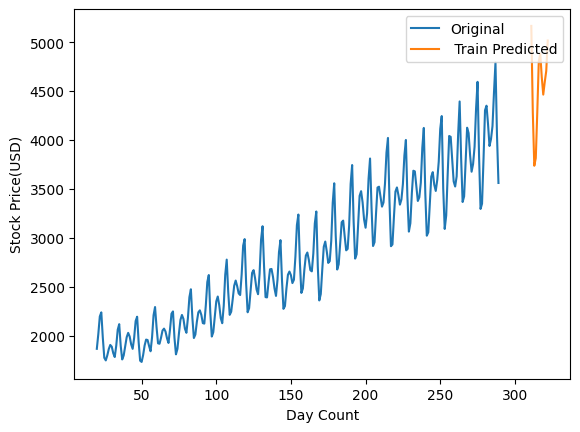

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# Function add a legend  
plt.legend(["Original", " Train Predicted","Test Predicted"], loc ="upper right")
plt.xlabel("Day Count")
plt.ylabel("Stock Price(USD)")
plt.show()

In [ ]:
len(test_data)

33

In [ ]:
x_input=test_data[13:].reshape(1,-1)
x_input.shape

(1, 20)

In [ ]:
x_input

array([[0.64612857, 0.65208462, 0.6771411 , 0.64612857, 0.62374204,
        0.62333128, 0.68699938, 0.97350585, 0.50605874, 0.5064695 ,
        0.64243171, 0.57835284, 0.69747381, 0.70609982, 0.71102896,
        0.69767919, 0.6360649 , 0.66461286, 0.74532758, 1.        ]])

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6461285684945575,
 0.652084616964469,
 0.6771410967344424,
 0.6461285684945575,
 0.6237420414869583,
 0.623331279523516,
 0.6869993838570547,
 0.973505853357979,
 0.5060587389607722,
 0.5064695009242144,
 0.6424317108235778,
 0.5783528445265969,
 0.6974738139248307,
 0.7060998151571165,
 0.7110289587184226,
 0.6976791949065517,
 0.6360649003902239,
 0.6646128568494556,
 0.7453275826658452,
 1.0]

In [ ]:
#x_input=x_input.reshape(1,-1)

In [ ]:
#x_input

In [ ]:
#x_input = x_input.reshape((1, 20, 1))

In [ ]:
#x_input

In [ ]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<10):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 20, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.59956455]
21
1 day input [0.65208462 0.6771411  0.64612857 0.62374204 0.62333128 0.68699938
 0.97350585 0.50605874 0.5064695  0.64243171 0.57835284 0.69747381
 0.70609982 0.71102896 0.69767919 0.6360649  0.66461286 0.74532758
 1.         0.59956455]
1 month output [[0.49056682]]
2 day input [0.6771411  0.64612857 0.62374204 0.62333128 0.68699938 0.97350585
 0.50605874 0.5064695  0.64243171 0.57835284 0.69747381 0.70609982
 0.71102896 0.69767919 0.6360649  0.66461286 0.74532758 1.
 0.59956455 0.49056682]
2 month output [[0.52058053]]
3 day input [0.64612857 0.62374204 0.62333128 0.68699938 0.97350585 0.50605874
 0.5064695  0.64243171 0.57835284 0.69747381 0.70609982 0.71102896
 0.69767919 0.6360649  0.66461286 0.74532758 1.         0.59956455
 0.49056682 0.52058053]
3 month output [[0.6716205]]
4 day input [0.62374204 0.62333128 0.68699938 0.97350585 0.50605874 0.5064695
 0.64243171 0.57835284 0.69747381 0.70609982 0.71102896 0.69767919
 0.6360649  0.66461286 0.74532758 1.         0.

In [ ]:
day_new=np.arange(1,21)
day_pred=np.arange(21,31)

In [ ]:
len(df)

324

Text(0, 0.5, 'Stock Price(USD)')

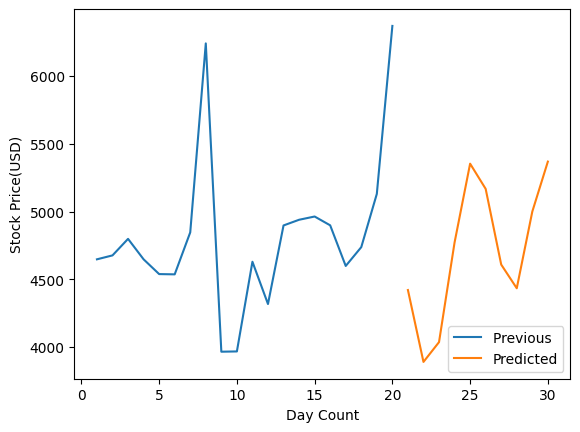

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[304:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(["Previous ", "Predicted"], loc ="lower right")
plt.xlabel("Day Count")
plt.ylabel("Sales Price(USD)")